# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [49]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "outer")
# Display the data table for previe
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [50]:
# Checking the number of mice.
merged_data["Mouse ID"].nunique()

249

In [51]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_data.loc[merged_data.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicates


array(['g989'], dtype=object)

In [52]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_df = merged_data.loc[merged_data["Mouse ID"] == "g989", :]
duplicates_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [53]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = merged_data[merged_data.isin(duplicates) == False]
clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [54]:
# Checking the number of mice in the clean DataFrame.
clean_data_df["Mouse ID"].nunique()

248

## Summary Statistics

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mean = clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).mean()
median = clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).median()
var = clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).var()
std = clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).std()
sem = clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = pd.DataFrame({ "Mean Tumor Volume" : mean,
                         "Median Tumor Volume" : median,
                         "Tumor Volume Variance": var,
                         "Tumor Volume Standard Deviation" : std,
                         "Tumor Volume Standard Error": sem})

summary_statistics_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_statistics_df.describe()



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,50.976144,49.942960,47.708346,6.809671,0.499641
std,5.621333,4.712429,16.057123,1.218709,0.102544
min,40.216745,40.673236,23.486704,4.846308,0.320955
25%,52.389707,51.085014,40.055400,6.328083,0.475424
50%,53.060651,51.819532,45.831020,6.766916,0.514641
75%,54.183257,52.396036,60.738703,7.793357,0.579276
max,55.235638,53.698743,68.553577,8.279709,0.603860


In [57]:
# Using the aggregation method, produce the same summary statistics in a single line.
agg_output = clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).agg(["mean",                                                                                                      
                                                                                            "median", 
                                                                                            "var", 
                                                                                            "std", 
                                                                                             "sem"])
agg_output

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [58]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#calculate mice count by drug regimen
mice_count = clean_data_df["Drug Regimen"].value_counts()
#mice_count


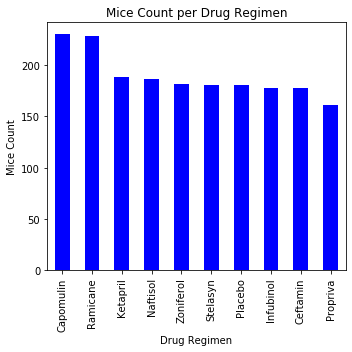

In [59]:
#plot bar chart
panda_bar = mice_count.plot(kind = "bar", color = "b", figsize = (5, 5))
plt.title("Mice Count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.tight_layout()

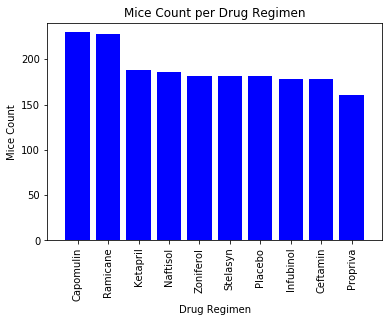

In [60]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#define axis and retrieve values
x_axis = mice_count.index.values
y_axis = mice_count.values

#plot using pyplot
plt.bar(x_axis, y_axis, color = "b", align = "center")
ticks = [i for i in x_axis]
plt.xticks(ticks, x_axis, rotation = "vertical")

plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+ 10)

plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.title("Mice Count per Drug Regimen")

plt.show()


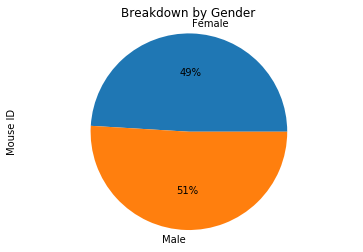

<Figure size 432x288 with 0 Axes>

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_data_df.groupby(clean_data_df["Sex"])["Mouse ID"].count()
gender_pie = gender.plot(kind = "pie", y = "Sex", title = "Breakdown by Gender", autopct = "%1.0f%%")

plt.axis("equal")
plt.show()
plt.tight_layout()

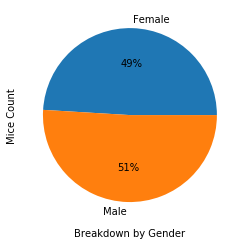

<Figure size 432x288 with 0 Axes>

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender.values, labels = gender.index.values, autopct = "%1.0f%%")
plt.xlabel("Breakdown by Gender")
plt.ylabel("Mice Count")

plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [103]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimens_df = clean_data_df[clean_data_df["Drug Regimen"].isin(drug_regimens)]
regimens_df.head()

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoint_df = regimens_df.groupby(["Mouse ID", "Drug Regimen"])
last_timepoint= last_timepoint_df.agg(x = ("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#last_timepoint




In [64]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [65]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [66]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [67]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [68]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

